In [5]:
!pip install tensorflow

     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/475.3 MB 1.6 MB/s eta 0:03:15

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [2]:
def load_glaucoma_dataset(data_dir, image_size):
    images = []
    labels = []
    class_names = ['Glaucoma_Negative', 'Glaucoma_Positive']
    
    for class_name in class_names:
        class_dir = os.path.join(data_dir, class_name)
        class_label = class_names.index(class_name)
        
        for filename in os.listdir(class_dir):
            if filename.endswith(".jpg"):  # Adjust the file extension based on your dataset
                img_path = os.path.join(class_dir, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (image_size, image_size))  # Resize images to match the model input size
                img = img / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(class_label)
                
    return np.array(images), np.array(labels)

In [3]:
# Replace 'your_dataset_path' with the actual path to your glaucoma dataset
your_dataset_path = '/home/user/Documents/Transfer/'
your_image_size = 32  # Change this to the size of your dataset images
glaucoma_train_images, glaucoma_train_labels = load_glaucoma_dataset(os.path.join(your_dataset_path, 'train'), your_image_size)
glaucoma_test_images, glaucoma_test_labels = load_glaucoma_dataset(os.path.join(your_dataset_path, 'test'), your_image_size)

In [4]:
# Model definition and modification for binary classification
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(your_image_size, your_image_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(glaucoma_train_images, glaucoma_train_labels, epochs=80, 
                    validation_data=(glaucoma_test_images, glaucoma_test_labels))

Epoch 1/80


14/14 [==============================] - 2s 48ms/step - loss: 0.6288 - accuracy: 0.6667 - val_loss: 0.6246 - val_accuracy: 0.7589
Epoch 2/80
14/14 [==============================] - 0s 27ms/step - loss: 0.6230 - accuracy: 0.6920 - val_loss: 0.5644 - val_accuracy: 0.7589
Epoch 3/80
14/14 [==============================] - 0s 28ms/step - loss: 0.6250 - accuracy: 0.6920 - val_loss: 0.5671 - val_accuracy: 0.7589
Epoch 4/80
14/14 [==============================] - 0s 28ms/step - loss: 0.6168 - accuracy: 0.6920 - val_loss: 0.5752 - val_accuracy: 0.7589
Epoch 5/80
14/14 [==============================] - 0s 27ms/step - loss: 0.6168 - accuracy: 0.6920 - val_loss: 0.5666 - val_accuracy: 0.7589
Epoch 6/80
14/14 [==============================] - 0s 27ms/step - loss: 0.6208 - accuracy: 0.6920 - val_loss: 0.5961 - val_accuracy: 0.7589
Epoch 7/80
14/14 [==============================] - 0s 27ms/step - loss: 0.6181 - accuracy: 0.6920 - val_loss: 0.5628 - val_accuracy: 0.7589
Epoch 8/80
14/14 [======

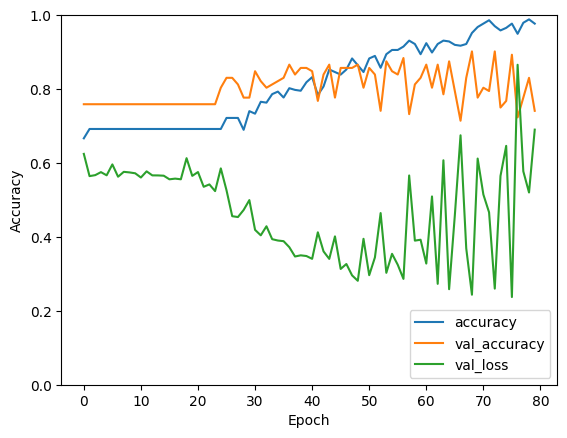

In [8]:
# Plotting the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [9]:
from sklearn.metrics import confusion_matrix, classification_report


In [10]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(glaucoma_test_images, glaucoma_test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Make predictions on the test set
predictions = model.predict(glaucoma_test_images)
predicted_labels = np.round(predictions).flatten()

# Print classification report
print("Classification Report:")
print(classification_report(glaucoma_test_labels, predicted_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(glaucoma_test_labels, predicted_labels))

4/4 - 0s - loss: 0.6902 - accuracy: 0.7411 - 78ms/epoch - 19ms/step
Test accuracy: 0.7410714030265808
4/4 [==============================] - 0s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.79        85
           1       0.48      1.00      0.65        27

    accuracy                           0.74       112
   macro avg       0.74      0.83      0.72       112
weighted avg       0.88      0.74      0.76       112

Confusion Matrix:
[[56 29]
 [ 0 27]]
